yt_xarray : [INFO ] 2024-05-02 14:38:36,319:  Inferred geometry type is geodetic. To override, use ds.yt.set_geometry
yt_xarray : [INFO ] 2024-05-02 14:38:36,438:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2024-05-02 14:38:36,438:      stretched grid detected: yt_xarray will interpolate.
yt : [INFO     ] 2024-05-02 14:38:36,581 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-05-02 14:38:36,581 Parameters: domain_dimensions         = [ 41 360 575]
yt : [INFO     ] 2024-05-02 14:38:36,582 Parameters: domain_left_edge          = [ 1.00000001e-01 -9.00000000e+01 -1.80000000e+02]
yt : [INFO     ] 2024-05-02 14:38:36,582 Parameters: domain_right_edge         = [1000.      90.     179.375]
yt : [INFO     ] 2024-05-02 14:38:36,583 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-02 14:38:37,114 xlim = -179.687500 179.687500
yt : [INFO     ] 2024-05-02 14:38:37,114 ylim = -90.000000 90.000000
yt : [INFO     ] 2024


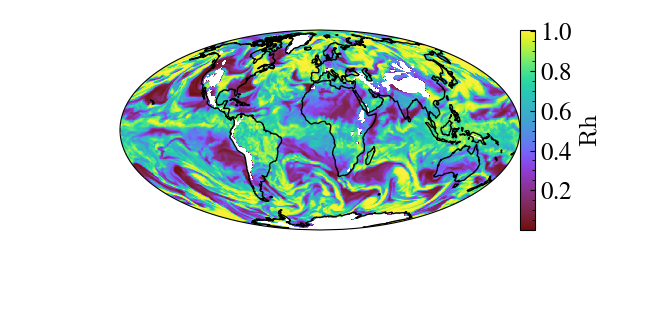

yt : [INFO     ] 2024-05-02 14:38:39,016 Saving plot slice_images/merra2_from_yt_convenience_800_hpa.png


['slice_images/merra2_from_yt_convenience_800_hpa.png']

In [1]:
import yt_xarray
import numpy as np 
import yt
import cartopy.feature as cfeature

dsx = yt_xarray.open_dataset("sample_nc/MERRA2_100.inst3_3d_asm_Np.19800120.nc4")

dsx0 = dsx.isel({'time':0})
slc = dsx0.yt.SlicePlot('altitude', 'RH', 
                        window_size=(4,2),
                        center=(800, 0.,0.))
slc.set_log('RH', False)
slc.render()
slc.plots['RH'].axes.add_feature(cfeature.COASTLINE)
slc.show()
slc.save('slice_images/merra2_from_yt_convenience_800_hpa.png')

yt_xarray : [INFO ] 2024-05-02 14:38:39,106:  Inferred geometry type is geodetic. To override, use ds.yt.set_geometry
yt_xarray : [INFO ] 2024-05-02 14:38:39,107:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2024-05-02 14:38:39,107:      stretched grid detected: yt_xarray will interpolate.
yt : [INFO     ] 2024-05-02 14:38:39,146 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-05-02 14:38:39,147 Parameters: domain_dimensions         = [41 80 64]
yt : [INFO     ] 2024-05-02 14:38:39,147 Parameters: domain_left_edge          = [ 1.00000001e-01  1.50000000e+01 -1.50000000e+02]
yt : [INFO     ] 2024-05-02 14:38:39,148 Parameters: domain_right_edge         = [1000.   55. -110.]
yt : [INFO     ] 2024-05-02 14:38:39,148 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-02 14:38:39,217 xlim = -150.000000 -110.000000
yt : [INFO     ] 2024-05-02 14:38:39,217 ylim = 15.000000 55.000000
yt : [INFO     ] 2024-05-02 14:38


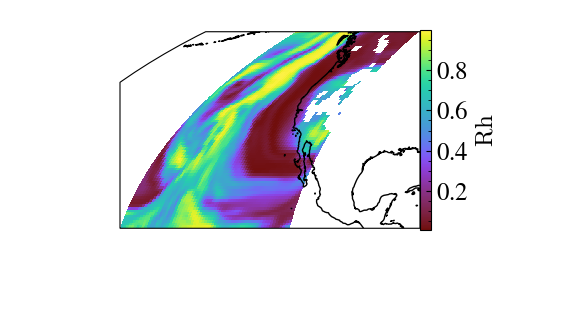

yt : [INFO     ] 2024-05-02 14:38:40,486 Saving plot slice_images/merra2_subset_from_load_grid_800hpa.png


['slice_images/merra2_subset_from_load_grid_800hpa.png']

In [2]:
lat_rng = [15., 55.]
lon_rng = [-150., -110.]

lat_vals = dsx0.lat.where(np.logical_and(dsx0.lat >= lat_rng[0], 
                                         dsx0.lat <= lat_rng[1]), 
                          drop=True)
lon_vals = dsx0.lon.where(np.logical_and(dsx0.lon >= lon_rng[0], 
                                         dsx0.lon <= lon_rng[1]), 
                          drop=True)

ds_sub_region = dsx0.sel({'lat': lat_vals, 'lon': lon_vals})


ds_yt = ds_sub_region.yt.load_grid(fields=['RH'])

c = ds_yt.domain_center.copy()
c[0] = 800

slc = yt.SlicePlot(ds_yt, 'altitude', 'RH', center=c, window_size=(3,2))
slc.set_log('RH', False)
slc.render()
slc.plots['RH'].axes.add_feature(cfeature.COASTLINE)
slc.show()
slc.save('slice_images/merra2_subset_from_load_grid_800hpa.png')

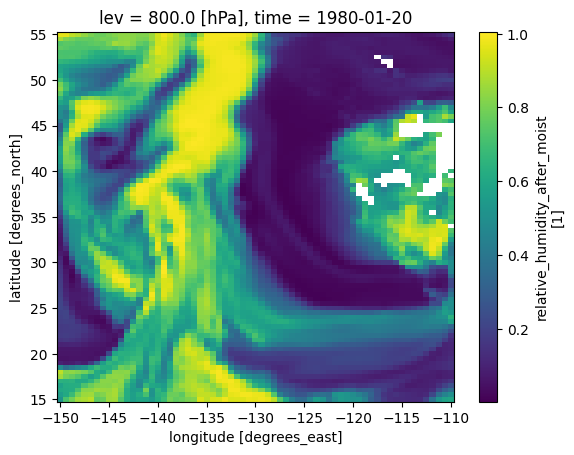

In [3]:
ds_sub_region.sel({'lev':800}).RH.plot()

In [4]:
from shutil import copyfile
import os 

files_to_copy = [os.path.join('slice_images','merra2_from_yt_convenience_800_hpa.png'),
                 os.path.join('slice_images','merra2_subset_from_load_grid_800hpa.png')]
dest_folder = os.path.join('..','yt_xr_2024','_static', 'images')

for fi in files_to_copy:
    dest_fi = os.path.join(dest_folder, os.path.basename(fi))
    copyfile(fi, dest_fi)
